# Health Data Breaches Analytics - Exploratory Analysis & Predictive Modeling



### Data is a  critical resources of any organiazation. Organizations spend huge amount of time and money to secure the data.It is a huge loss for companies if the data has breached especially the client data.So we have to Predict the data breach happened in health industry due to the business associate or not. it will allow them to identify the risks and help understand and provie necessary support to retain those data or do prevent the data to minimize the impact to the orgranization.

#### The dataset has 17 columns and around 1700 rows.  The columns are pretty self-explanatory, mentioned below:
Name of Covered Entity – Names of various different health companies,
State – Respective names of states,
Covered Entity Type – Different categories of health facilities,
Individuals Affected – # of count of affected individuals,
Breach Submission Date – Date of breach happened,
2009 – Year Column having single value “1”, where 1 mean yes,
2010 – Year Column having single value “1”, where 1 mean yes,
2011 – Year Column having single value “1”, where 1 mean yes,
2012 – Year Column having single value “1”, where 1 mean yes,
2013 – Year Column having single value “1”, where 1 mean yes,
2014 – Year Column having single value “1”, where 1 mean yes,
2015 – Year Column having single value “1”, where 1 mean yes,
2016 – Year Column having single value “1”, where 1 mean yes,
Type of Breach – Different type of breach,
Location of Breached Information – More information related to breach,
Business Associate Present (Target column) – Is breach happened due to BA, where it contain value “Yes” and “No”  ,
Web Description – Contain English language Description about web.


# 1.Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from io import StringIO
import datetime
%matplotlib inline

In [2]:
df = pd.read_excel (r'C:\Users\yash0\Health_Data_Breaches.xlsx', encoding='UTF-8')## importing the data

In [3]:
df.head()##analyzing the top 5 rows of the dataset

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,2009,2010,2011,2012,2013,2014,2015,2016,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,Advantage Consolidated LLC,OR,Healthcare Provider,151626,2015-03-18,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Hacking/IT Incident,Other,No,NaN
1,"Doctors First Choice Billings, Inc.",FL,Business Associate,1831,2014-06-12,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Hacking/IT Incident,Other,Yes,\N
2,"Goshen Health System, Inc.",IN,Healthcare Provider,660,2012-02-14,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Hacking/IT Incident,Other,No,Computer servers of Goshen Health System's bus...
3,Group Life Hospital and Medical Program,CT,Health Plan,3000,2016-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Hacking/IT Incident,Other,No,NaN
4,"Health Incent, LLC",TN,Healthcare Provider,1100,2016-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Hacking/IT Incident,Other,No,NaN


In [4]:
df.shape ## for the total no. of rowns and columns in a dataset

(1700, 17)

In [5]:
df.columns## disply all the column in the dataset

Index([          'Name of Covered Entity',                            'State',
                    'Covered Entity Type',             'Individuals Affected',
                 'Breach Submission Date',                               2009,
                                     2010,                               2011,
                                     2012,                               2013,
                                     2014,                               2015,
                                     2016,                   'Type of Breach',
       'Location of Breached Information',       'Business Associate Present',
                        'Web Description'],
      dtype='object')

In [6]:
df.info()##more depth of the data shows the data-type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 17 columns):
Name of Covered Entity              1700 non-null object
State                               1689 non-null object
Covered Entity Type                 1658 non-null object
Individuals Affected                1677 non-null object
Breach Submission Date              1700 non-null datetime64[ns]
2009                                18 non-null float64
2010                                198 non-null float64
2011                                196 non-null float64
2012                                207 non-null float64
2013                                273 non-null float64
2014                                293 non-null float64
2015                                269 non-null float64
2016                                241 non-null float64
Type of Breach                      1686 non-null object
Location of Breached Information    1689 non-null object
Business Associate Present     

In [7]:
df.isnull().sum()##it shows the total no of null values present in each column of the dataset

Name of Covered Entity                 0
State                                 11
Covered Entity Type                   42
Individuals Affected                  23
Breach Submission Date                 0
2009                                1682
2010                                1502
2011                                1504
2012                                1493
2013                                1427
2014                                1407
2015                                1431
2016                                1459
Type of Breach                        14
Location of Breached Information      11
Business Associate Present             0
Web Description                      398
dtype: int64

In [8]:
df.describe()

,2009,2010,2011,2012,2013,2014,2015,2016
count,18.0,198.0,196.0,207.0,273.0,293.0,269.0,241.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# 2.Data Cleaning

In [9]:
df['Business Associate Present'].value_counts()#it tells about the dataset whether the targetis balanced or imbalanced.
                                               #by the results we can conclude that the data is 77% is no and the 23% data is yes 
                                               #so we can say that the data is imbalance

No     1393
Yes     307
Name: Business Associate Present, dtype: int64

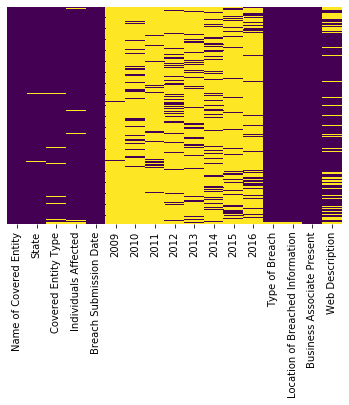

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')## this figure shows the null value for each column in more 
                                                                    ## crystal clear way graphically

In [11]:
df['Breach_Year'] = df['Breach Submission Date'].dt.strftime('%Y')#we extract the year and month from the breach submission date  
                                                                  #so we directly neglect the column which shows individual year
                                                                  #name so we can decrease the size of the features 
df['Breach_Month'] = df['Breach Submission Date'].dt.strftime('%m')

In [12]:
df.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,2009,2010,2011,2012,2013,2014,2015,2016,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Breach_Year,Breach_Month
0,Advantage Consolidated LLC,OR,Healthcare Provider,151626,2015-03-18,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Hacking/IT Incident,Other,No,NaN,2015,03
1,"Doctors First Choice Billings, Inc.",FL,Business Associate,1831,2014-06-12,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Hacking/IT Incident,Other,Yes,\N,2014,06
2,"Goshen Health System, Inc.",IN,Healthcare Provider,660,2012-02-14,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Hacking/IT Incident,Other,No,Computer servers of Goshen Health System's bus...,2012,02
3,Group Life Hospital and Medical Program,CT,Health Plan,3000,2016-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Hacking/IT Incident,Other,No,NaN,2016,02
4,"Health Incent, LLC",TN,Healthcare Provider,1100,2016-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Hacking/IT Incident,Other,No,NaN,2016,07


In [13]:
df.drop([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 'Breach Submission Date',], axis=1, inplace=True)##so here we are dropping the column becuse we have created single column which exactly 
                                                                               ##interpret the same information like all shows collectively

In [14]:
df.head() ##from this we conclude that we decrese the no of features in a dataset

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Breach_Year,Breach_Month
0,Advantage Consolidated LLC,OR,Healthcare Provider,151626,Hacking/IT Incident,Other,No,NaN,2015,03
1,"Doctors First Choice Billings, Inc.",FL,Business Associate,1831,Hacking/IT Incident,Other,Yes,\N,2014,06
2,"Goshen Health System, Inc.",IN,Healthcare Provider,660,Hacking/IT Incident,Other,No,Computer servers of Goshen Health System's bus...,2012,02
3,Group Life Hospital and Medical Program,CT,Health Plan,3000,Hacking/IT Incident,Other,No,NaN,2016,02
4,"Health Incent, LLC",TN,Healthcare Provider,1100,Hacking/IT Incident,Other,No,NaN,2016,07


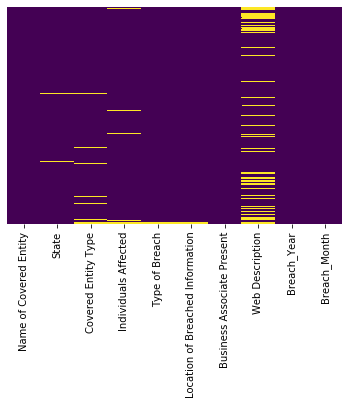

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
##here we fill the categorial data with th most frequent data using mode

In [17]:
df['State']=df['State'].fillna(df['State'].mode()[0])
df['Covered Entity Type']=df['Covered Entity Type'].fillna(df['Covered Entity Type'].mode()[0])
df['Type of Breach']=df['Type of Breach'].fillna(df['Type of Breach'].mode()[0])
df['Location of Breached Information']=df['Location of Breached Information'].fillna(df['Location of Breached Information'].mode()[0])

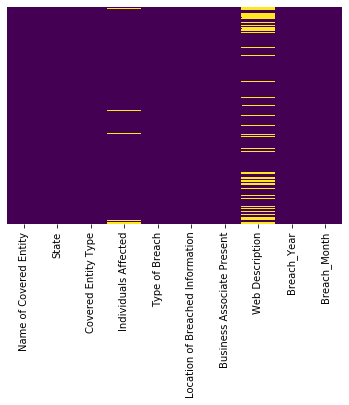

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
#individual affected is the continous data so we have to fill the data with the imputation

In [20]:
df['Individuals Affected'] = pd.to_numeric(df['Individuals Affected'],errors='coerce')##we have to convert the data into float because our data is in string

In [21]:
df.info()## we have succesfully convert the object into float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 10 columns):
Name of Covered Entity              1700 non-null object
State                               1700 non-null object
Covered Entity Type                 1700 non-null object
Individuals Affected                1676 non-null float64
Type of Breach                      1700 non-null object
Location of Breached Information    1700 non-null object
Business Associate Present          1700 non-null object
Web Description                     1302 non-null object
Breach_Year                         1700 non-null object
Breach_Month                        1700 non-null object
dtypes: float64(1), object(9)
memory usage: 132.9+ KB


In [22]:
df['Individuals Affected']=df['Individuals Affected'].fillna(df['Individuals Affected'].mean())##here we are filling the value using mean

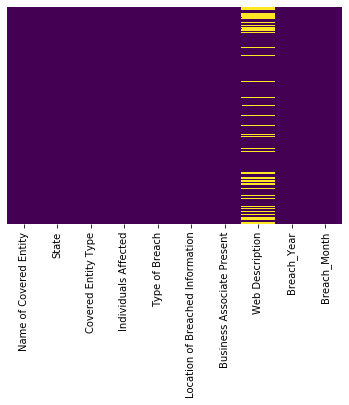

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
df['Web Description'].value_counts()
##from this we conclude that more than 1k values are null so we decide not to take in cosideration

\N                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [25]:
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))
        ##here we print the unique values which are present in each column

Feature 'Name of Covered Entity' has 1550 unique categories
Feature 'State' has 52 unique categories
Feature 'Covered Entity Type' has 4 unique categories
Feature 'Type of Breach' has 28 unique categories
Feature 'Location of Breached Information' has 62 unique categories
Feature 'Business Associate Present' has 2 unique categories
Feature 'Web Description' has 688 unique categories
Feature 'Breach_Year' has 8 unique categories
Feature 'Breach_Month' has 12 unique categories


# so we here handle all the missing values now its time to see the relation between the columns visually

# 3.Data Analysis

### 3.1.Univarite Analysis

Text(0, 0.5, 'Frequency')

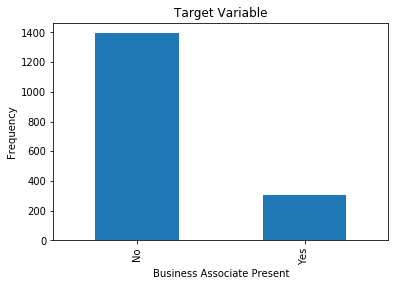

In [26]:
count_target = pd.value_counts(df['Business Associate Present'], sort = True).sort_index()
count_target.plot(kind='bar', stacked=True, fig=(18,6))
plt.title("Target Variable")
plt.xlabel("Business Associate Present")
plt.ylabel("Frequency")
##from this we conclude that our target variable is imbalance more than 75% data is No.so we have to balance it further so that 
## our model won't be overfitted.

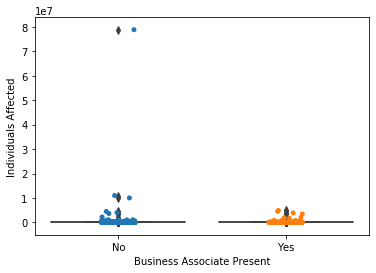

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="Business Associate Present", y="Individuals Affected", data=df)
ax = sns.stripplot(x="Business Associate Present", y="Individuals Affected",data=df, jitter=True,edgecolor="gray")
##from this we conclude that there are so many values outside the box 

Text(0.5, 1.0, 'Data_Breach_Year_Wise')

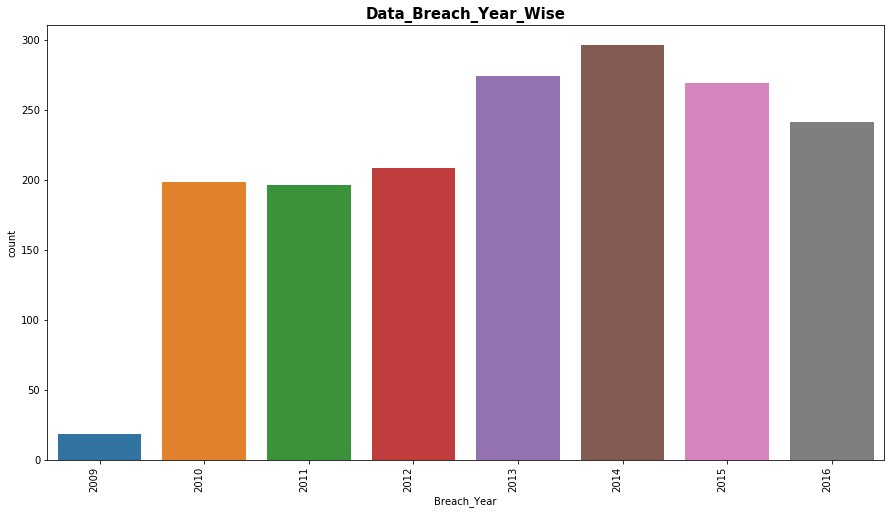

In [28]:
sns.countplot(df['Breach_Year'])
sns.countplot(df['Breach_Year']).set_xticklabels(sns.countplot(df['Breach_Year']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.title('Data_Breach_Year_Wise', fontsize=15,fontweight='bold')
##from this we conclude that maximum data breach in year 2014

C:\Users\yash0\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\yash0\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


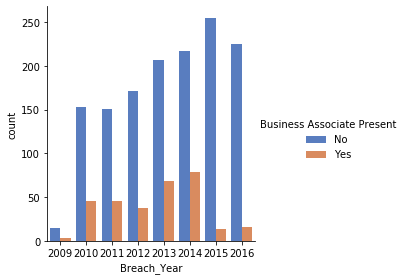

In [29]:
Breach_Year_count = df[['Breach_Year', 'Business Associate Present']].groupby(['Breach_Year', 'Business Associate Present']).size().reset_index()
Breach_Year_count.columns = ['Breach_Year', 'Business Associate Present', 'count']

sns.factorplot(x="Breach_Year", y = 'count', hue="Business Associate Present", data=Breach_Year_count,
               size=4, kind="bar", palette="muted")
##it tells about data breach year wise in which business associate present or not.

Text(0.5, 1.0, 'Location wise count for Data_Breach')

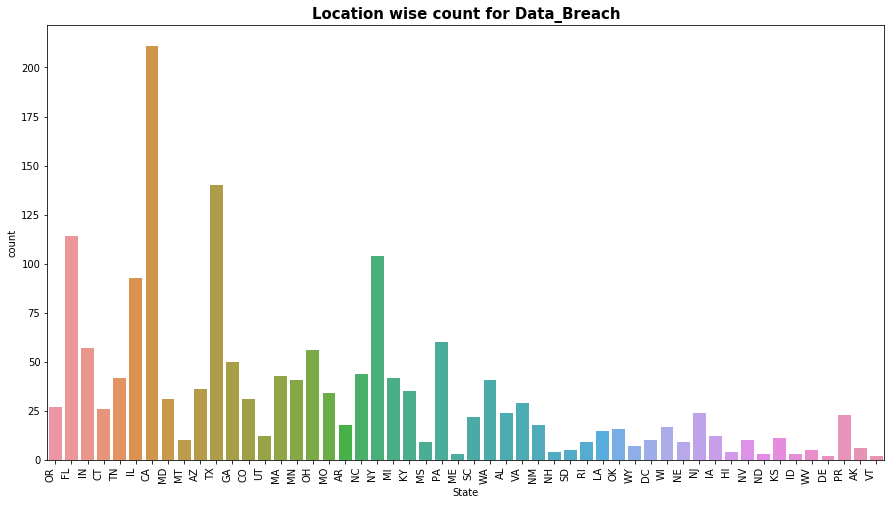

In [30]:
sns.countplot(df['State'])
sns.countplot(df['State']).set_xticklabels(sns.countplot(df['State']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.title('Location wise count for Data_Breach', fontsize=15,fontweight='bold')
##from this we conclude that in california maximum no data breach is happening

### 3.2.Bivarite Analysis 

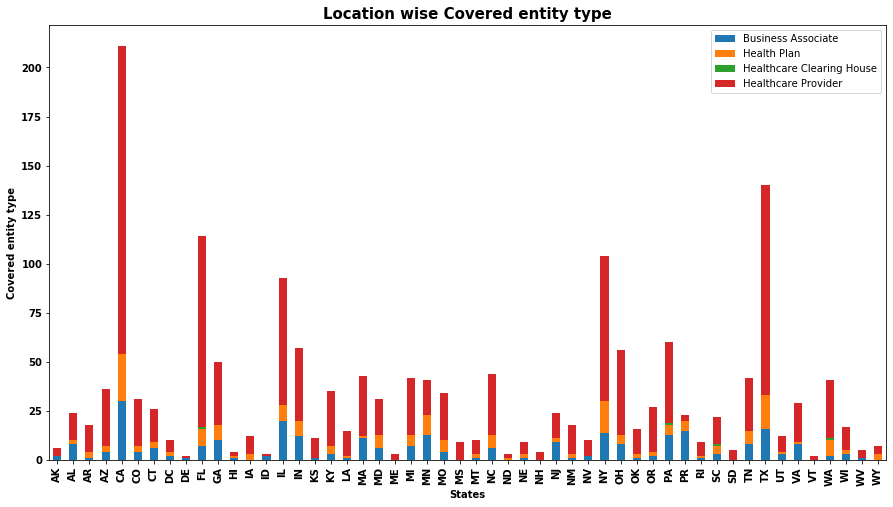

In [31]:
plt.rcParams['figure.figsize'] = (15, 8)
loc_plt=pd.crosstab(df['State'],df['Covered Entity Type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location wise Covered entity type',fontsize=15,fontweight='bold')
plt.ylabel('Covered entity type',fontsize=10,fontweight='bold')
plt.xlabel('States',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend();
#from this we conclude about the loss of data of each covered entity statewise in which healthcare protryvider 
#is the major loss for each and every country

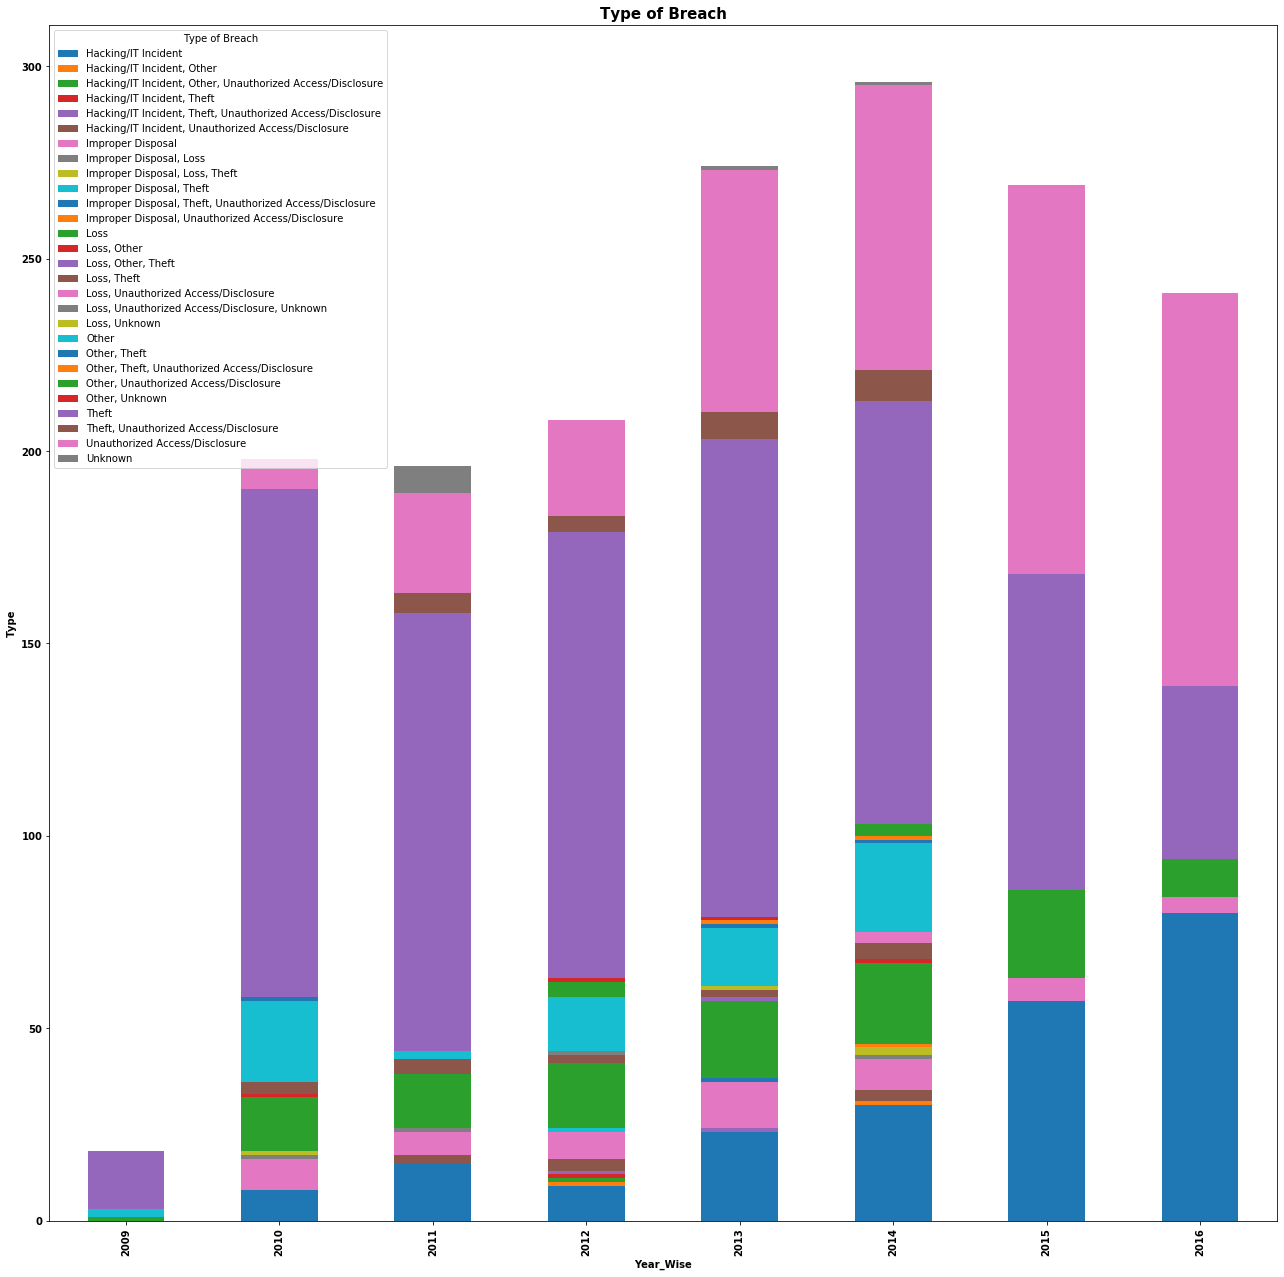

In [32]:
plt.rcParams['figure.figsize'] = (22, 22)
type_plt=pd.crosstab(df['Breach_Year'],df['Type of Breach'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type of Breach',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Year_Wise',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
## it shows the types of breach yearwise 

Text(0.5, 1.0, 'Location of breached information')

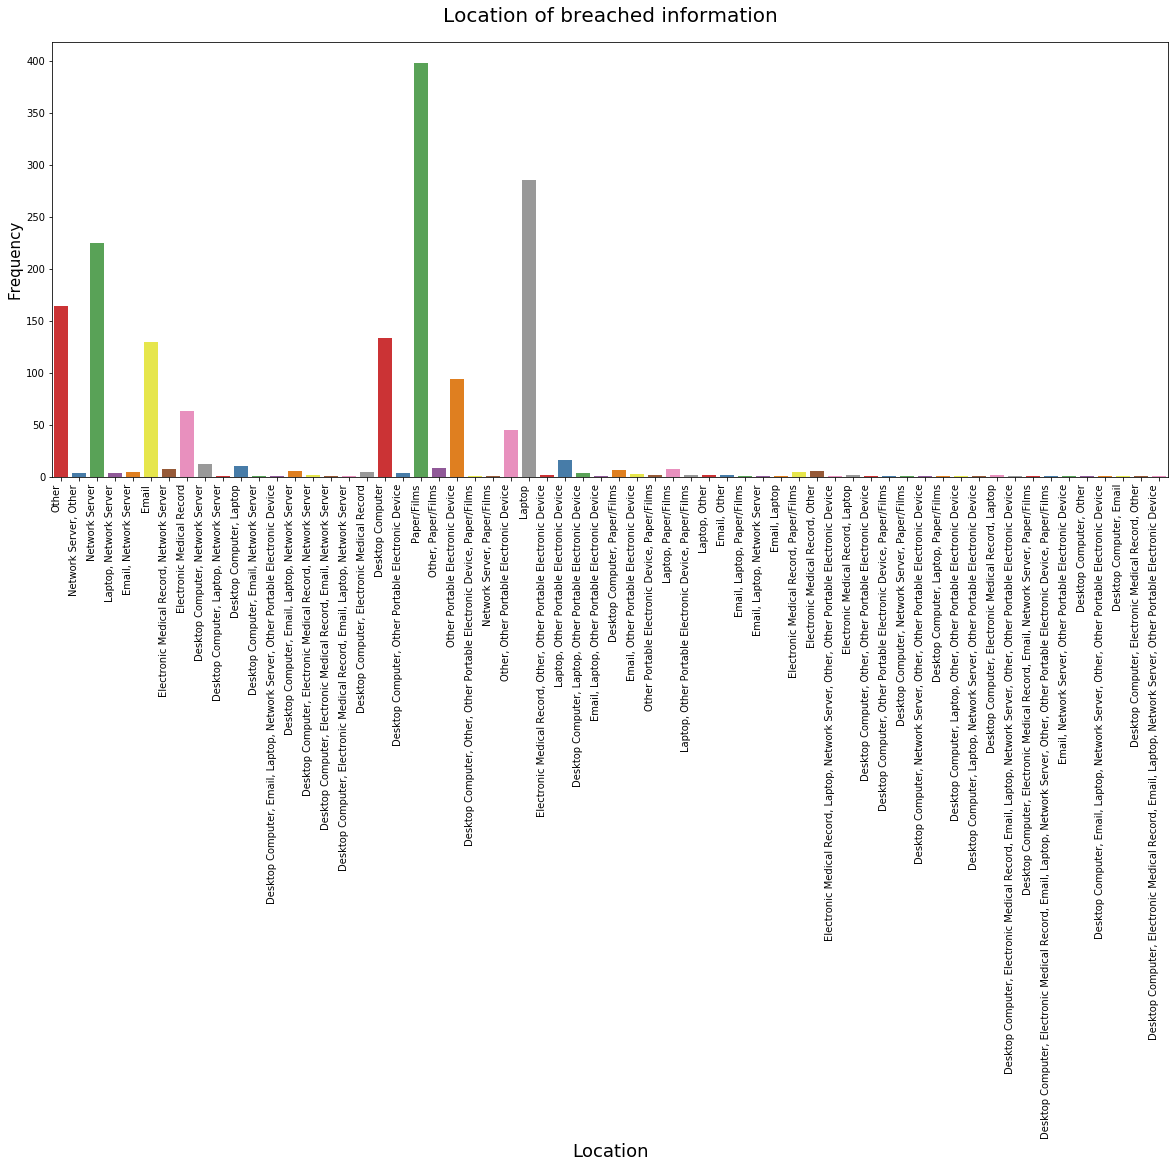

In [33]:
fig = plt.figure(figsize=(20,8))
loc = sns.countplot(x="Location of Breached Information",data=df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('Location of breached information',size = 20,pad=20)
#it tells about the location of breached information

# 4.Feature Engineering

In [34]:
df.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Breach_Year,Breach_Month
0,Advantage Consolidated LLC,OR,Healthcare Provider,151626.0,Hacking/IT Incident,Other,No,NaN,2015,03
1,"Doctors First Choice Billings, Inc.",FL,Business Associate,1831.0,Hacking/IT Incident,Other,Yes,\N,2014,06
2,"Goshen Health System, Inc.",IN,Healthcare Provider,660.0,Hacking/IT Incident,Other,No,Computer servers of Goshen Health System's bus...,2012,02
3,Group Life Hospital and Medical Program,CT,Health Plan,3000.0,Hacking/IT Incident,Other,No,NaN,2016,02
4,"Health Incent, LLC",TN,Healthcare Provider,1100.0,Hacking/IT Incident,Other,No,NaN,2016,07


In [35]:
top_20 = [x for x in df.State.value_counts().sort_values(ascending=False).head(20).index]
top_20
##here i have sort top 20 data states in which the maximum data has breached

['CA',
 'TX',
 'FL',
 'NY',
 'IL',
 'PA',
 'IN',
 'OH',
 'GA',
 'NC',
 'MA',
 'MI',
 'TN',
 'MN',
 'WA',
 'AZ',
 'KY',
 'MO',
 'MD',
 'CO']

In [36]:
def one_hot_top_x(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)
one_hot_top_x(df, 'State', top_20)
df.head()
##here i have created a function to convert my values into dummy variables here i have selected the most 20 frequent 
##values so that the features will not increased and further i have convert all the columns into the dummy variables which 
##have the unique values 

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Breach_Year,Breach_Month,...,State_MA,State_MI,State_TN,State_MN,State_WA,State_AZ,State_KY,State_MO,State_MD,State_CO
0,Advantage Consolidated LLC,OR,Healthcare Provider,151626.0,Hacking/IT Incident,Other,No,NaN,2015,03,...,0,0,0,0,0,0,0,0,0,0
1,"Doctors First Choice Billings, Inc.",FL,Business Associate,1831.0,Hacking/IT Incident,Other,Yes,\N,2014,06,...,0,0,0,0,0,0,0,0,0,0
2,"Goshen Health System, Inc.",IN,Healthcare Provider,660.0,Hacking/IT Incident,Other,No,Computer servers of Goshen Health System's bus...,2012,02,...,0,0,0,0,0,0,0,0,0,0
3,Group Life Hospital and Medical Program,CT,Health Plan,3000.0,Hacking/IT Incident,Other,No,NaN,2016,02,...,0,0,0,0,0,0,0,0,0,0
4,"Health Incent, LLC",TN,Healthcare Provider,1100.0,Hacking/IT Incident,Other,No,NaN,2016,07,...,0,0,1,0,0,0,0,0,0,0


In [37]:
top_4 = [x for x in df['Covered Entity Type'].value_counts().sort_values(ascending=False).head().index]
top_4

['Healthcare Provider',
 'Business Associate',
 'Health Plan',
 'Healthcare Clearing House']

In [38]:
one_hot_top_x(df, 'Covered Entity Type', top_20)
df.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Breach_Year,Breach_Month,...,Covered Entity Type_MA,Covered Entity Type_MI,Covered Entity Type_TN,Covered Entity Type_MN,Covered Entity Type_WA,Covered Entity Type_AZ,Covered Entity Type_KY,Covered Entity Type_MO,Covered Entity Type_MD,Covered Entity Type_CO
0,Advantage Consolidated LLC,OR,Healthcare Provider,151626.0,Hacking/IT Incident,Other,No,NaN,2015,03,...,0,0,0,0,0,0,0,0,0,0
1,"Doctors First Choice Billings, Inc.",FL,Business Associate,1831.0,Hacking/IT Incident,Other,Yes,\N,2014,06,...,0,0,0,0,0,0,0,0,0,0
2,"Goshen Health System, Inc.",IN,Healthcare Provider,660.0,Hacking/IT Incident,Other,No,Computer servers of Goshen Health System's bus...,2012,02,...,0,0,0,0,0,0,0,0,0,0
3,Group Life Hospital and Medical Program,CT,Health Plan,3000.0,Hacking/IT Incident,Other,No,NaN,2016,02,...,0,0,0,0,0,0,0,0,0,0
4,"Health Incent, LLC",TN,Healthcare Provider,1100.0,Hacking/IT Incident,Other,No,NaN,2016,07,...,0,0,0,0,0,0,0,0,0,0


In [39]:
top_20 = [x for x in df['Type of Breach'].value_counts().sort_values(ascending=False).head(20).index]
top_20

['Theft',
 'Unauthorized Access/Disclosure',
 'Hacking/IT Incident',
 'Loss',
 'Other',
 'Improper Disposal',
 'Theft, Unauthorized Access/Disclosure',
 'Loss, Theft',
 'Unknown',
 'Hacking/IT Incident, Unauthorized Access/Disclosure',
 'Other, Unauthorized Access/Disclosure',
 'Other, Theft',
 'Improper Disposal, Loss',
 'Improper Disposal, Loss, Theft',
 'Loss, Unauthorized Access/Disclosure',
 'Hacking/IT Incident, Other',
 'Hacking/IT Incident, Theft, Unauthorized Access/Disclosure',
 'Loss, Other',
 'Other, Unknown',
 'Other, Theft, Unauthorized Access/Disclosure']

In [40]:
one_hot_top_x(df, 'Type of Breach', top_20)
df.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Breach_Year,Breach_Month,...,"Type of Breach_Other, Unauthorized Access/Disclosure","Type of Breach_Other, Theft","Type of Breach_Improper Disposal, Loss","Type of Breach_Improper Disposal, Loss, Theft","Type of Breach_Loss, Unauthorized Access/Disclosure","Type of Breach_Hacking/IT Incident, Other","Type of Breach_Hacking/IT Incident, Theft, Unauthorized Access/Disclosure","Type of Breach_Loss, Other","Type of Breach_Other, Unknown","Type of Breach_Other, Theft, Unauthorized Access/Disclosure"
0,Advantage Consolidated LLC,OR,Healthcare Provider,151626.0,Hacking/IT Incident,Other,No,NaN,2015,03,...,0,0,0,0,0,0,0,0,0,0
1,"Doctors First Choice Billings, Inc.",FL,Business Associate,1831.0,Hacking/IT Incident,Other,Yes,\N,2014,06,...,0,0,0,0,0,0,0,0,0,0
2,"Goshen Health System, Inc.",IN,Healthcare Provider,660.0,Hacking/IT Incident,Other,No,Computer servers of Goshen Health System's bus...,2012,02,...,0,0,0,0,0,0,0,0,0,0
3,Group Life Hospital and Medical Program,CT,Health Plan,3000.0,Hacking/IT Incident,Other,No,NaN,2016,02,...,0,0,0,0,0,0,0,0,0,0
4,"Health Incent, LLC",TN,Healthcare Provider,1100.0,Hacking/IT Incident,Other,No,NaN,2016,07,...,0,0,0,0,0,0,0,0,0,0


In [41]:
top_20 = [x for x in df['Location of Breached Information'].value_counts().sort_values(ascending=False).head(20).index]
top_20

['Paper/Films',
 'Laptop',
 'Network Server',
 'Other',
 'Desktop Computer',
 'Email',
 'Other Portable Electronic Device',
 'Electronic Medical Record',
 'Other, Other Portable Electronic Device',
 'Laptop, Other Portable Electronic Device',
 'Desktop Computer, Network Server',
 'Desktop Computer, Laptop',
 'Other, Paper/Films',
 'Laptop, Paper/Films',
 'Electronic Medical Record, Network Server',
 'Desktop Computer, Paper/Films',
 'Electronic Medical Record, Other',
 'Desktop Computer, Email, Laptop, Network Server',
 'Email, Network Server',
 'Desktop Computer, Electronic Medical Record']

In [42]:
one_hot_top_x(df, 'Location of Breached Information', top_20)
df.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Breach_Year,Breach_Month,...,"Location of Breached Information_Desktop Computer, Network Server","Location of Breached Information_Desktop Computer, Laptop","Location of Breached Information_Other, Paper/Films","Location of Breached Information_Laptop, Paper/Films","Location of Breached Information_Electronic Medical Record, Network Server","Location of Breached Information_Desktop Computer, Paper/Films","Location of Breached Information_Electronic Medical Record, Other","Location of Breached Information_Desktop Computer, Email, Laptop, Network Server","Location of Breached Information_Email, Network Server","Location of Breached Information_Desktop Computer, Electronic Medical Record"
0,Advantage Consolidated LLC,OR,Healthcare Provider,151626.0,Hacking/IT Incident,Other,No,NaN,2015,03,...,0,0,0,0,0,0,0,0,0,0
1,"Doctors First Choice Billings, Inc.",FL,Business Associate,1831.0,Hacking/IT Incident,Other,Yes,\N,2014,06,...,0,0,0,0,0,0,0,0,0,0
2,"Goshen Health System, Inc.",IN,Healthcare Provider,660.0,Hacking/IT Incident,Other,No,Computer servers of Goshen Health System's bus...,2012,02,...,0,0,0,0,0,0,0,0,0,0
3,Group Life Hospital and Medical Program,CT,Health Plan,3000.0,Hacking/IT Incident,Other,No,NaN,2016,02,...,0,0,0,0,0,0,0,0,0,0
4,"Health Incent, LLC",TN,Healthcare Provider,1100.0,Hacking/IT Incident,Other,No,NaN,2016,07,...,0,0,0,0,0,0,0,0,0,0


In [43]:
top_20 = [x for x in df['Breach_Year'].value_counts().sort_values(ascending=False).head(20).index]
top_20

['2014', '2013', '2015', '2016', '2012', '2010', '2011', '2009']

In [44]:
one_hot_top_x(df, 'Breach_Year', top_20)
df.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Breach_Year,Breach_Month,...,"Location of Breached Information_Email, Network Server","Location of Breached Information_Desktop Computer, Electronic Medical Record",Breach_Year_2014,Breach_Year_2013,Breach_Year_2015,Breach_Year_2016,Breach_Year_2012,Breach_Year_2010,Breach_Year_2011,Breach_Year_2009
0,Advantage Consolidated LLC,OR,Healthcare Provider,151626.0,Hacking/IT Incident,Other,No,NaN,2015,03,...,0,0,0,0,1,0,0,0,0,0
1,"Doctors First Choice Billings, Inc.",FL,Business Associate,1831.0,Hacking/IT Incident,Other,Yes,\N,2014,06,...,0,0,1,0,0,0,0,0,0,0
2,"Goshen Health System, Inc.",IN,Healthcare Provider,660.0,Hacking/IT Incident,Other,No,Computer servers of Goshen Health System's bus...,2012,02,...,0,0,0,0,0,0,1,0,0,0
3,Group Life Hospital and Medical Program,CT,Health Plan,3000.0,Hacking/IT Incident,Other,No,NaN,2016,02,...,0,0,0,0,0,1,0,0,0,0
4,"Health Incent, LLC",TN,Healthcare Provider,1100.0,Hacking/IT Incident,Other,No,NaN,2016,07,...,0,0,0,0,0,1,0,0,0,0


In [45]:
top_20 = [x for x in df['Breach_Month'].value_counts().sort_values(ascending=False).head(20).index]
top_20

['04', '03', '07', '09', '10', '08', '05', '11', '06', '02', '01', '12']

In [46]:
one_hot_top_x(df, 'Breach_Month', top_20)
df.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Breach_Year,Breach_Month,...,Breach_Month_07,Breach_Month_09,Breach_Month_10,Breach_Month_08,Breach_Month_05,Breach_Month_11,Breach_Month_06,Breach_Month_02,Breach_Month_01,Breach_Month_12
0,Advantage Consolidated LLC,OR,Healthcare Provider,151626.0,Hacking/IT Incident,Other,No,NaN,2015,03,...,0,0,0,0,0,0,0,0,0,0
1,"Doctors First Choice Billings, Inc.",FL,Business Associate,1831.0,Hacking/IT Incident,Other,Yes,\N,2014,06,...,0,0,0,0,0,0,1,0,0,0
2,"Goshen Health System, Inc.",IN,Healthcare Provider,660.0,Hacking/IT Incident,Other,No,Computer servers of Goshen Health System's bus...,2012,02,...,0,0,0,0,0,0,0,1,0,0
3,Group Life Hospital and Medical Program,CT,Health Plan,3000.0,Hacking/IT Incident,Other,No,NaN,2016,02,...,0,0,0,0,0,0,0,1,0,0
4,"Health Incent, LLC",TN,Healthcare Provider,1100.0,Hacking/IT Incident,Other,No,NaN,2016,07,...,1,0,0,0,0,0,0,0,0,0


In [47]:
df.drop(['State', 'Covered Entity Type', 'Type of Breach', 'Location of Breached Information', 'Breach_Year', 'Breach_Month','Name of Covered Entity'], axis=1, inplace=True)

In [48]:
df.head()

,Individuals Affected,Business Associate Present,Web Description,State_CA,State_TX,State_FL,State_NY,State_IL,State_PA,State_IN,...,Breach_Month_07,Breach_Month_09,Breach_Month_10,Breach_Month_08,Breach_Month_05,Breach_Month_11,Breach_Month_06,Breach_Month_02,Breach_Month_01,Breach_Month_12
0,151626.0,No,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1831.0,Yes,\N,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,660.0,No,Computer servers of Goshen Health System's bus...,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,3000.0,No,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1100.0,No,NaN,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [49]:
##After converting all columns into the dummy variables the no of features drastically increase from 10 to 103.so,after we have to 
##to use the feature reduction technique to reduce the no of columns.

In [50]:
corr_matrix = df.corr()
print(corr_matrix)
##here i have check the correlation between the columns

                      Individuals Affected  State_CA  State_TX  State_FL  \
Individuals Affected              1.000000 -0.010821 -0.010843 -0.006746   
State_CA                         -0.010821  1.000000 -0.112771 -0.100924   
State_TX                         -0.010843 -0.112771  1.000000 -0.080316   
State_FL                         -0.006746 -0.100924 -0.080316  1.000000   
State_NY                          0.007516 -0.096094 -0.076472 -0.068439   
...                                    ...       ...       ...       ...   
Breach_Month_11                  -0.004833  0.025024 -0.014348 -0.033376   
Breach_Month_06                  -0.011941  0.016081 -0.019412  0.013920   
Breach_Month_02                  -0.010182 -0.011161 -0.035749  0.022898   
Breach_Month_01                  -0.011268 -0.011161  0.045935 -0.013012   
Breach_Month_12                  -0.012436  0.016525 -0.006042 -0.008448   

                      State_NY  State_IL  State_PA  State_IN  State_OH  \
Individuals A

In [51]:
df['Business Associate Present'] = np.where(df['Business Associate Present'] == 'Yes', 1, 0)
##here i have convert the target coluumn into binary 

In [52]:
df.head()

,Individuals Affected,Business Associate Present,Web Description,State_CA,State_TX,State_FL,State_NY,State_IL,State_PA,State_IN,...,Breach_Month_07,Breach_Month_09,Breach_Month_10,Breach_Month_08,Breach_Month_05,Breach_Month_11,Breach_Month_06,Breach_Month_02,Breach_Month_01,Breach_Month_12
0,151626.0,0,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1831.0,1,\N,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,660.0,0,Computer servers of Goshen Health System's bus...,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,3000.0,0,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1100.0,0,NaN,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Splitting independent and dependent variable

In [53]:
##Here we splitting our column into independent and dependent variable

In [54]:
features = df[df.columns.difference(['Business Associate Present', 'Web Description'])]
#this is our independent feature

In [55]:
labels = df['Business Associate Present']
##this is our dependent variables

# 5.Variable Selection using Vote based approach

### 5.1.Variable Importance using Random Forest

In [56]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)


0.9994117647058823


In [57]:

from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)

In [58]:
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

,index,RF
40,Individuals Affected,0.208312
62,State_CA,0.026696
55,Location of Breached Information_Network Server,0.026355
60,Location of Breached Information_Paper/Films,0.025572
97,Type of Breach_Theft,0.024793
...,...,...
31,Covered Entity Type_MN,0.000000
24,Covered Entity Type_GA,0.000000
30,Covered Entity Type_MI,0.000000
25,Covered Entity Type_IL,0.000000


### 5.2.Recursive Feature Elimination

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 50)
fit = rfe.fit(features, labels)

C:\Users\yash0\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=50 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [60]:
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

In [61]:
Selected[Selected['RFE'] == True]


,index,RFE
0,Breach_Month_01,True
1,Breach_Month_02,True
2,Breach_Month_03,True
3,Breach_Month_04,True
4,Breach_Month_05,True
5,Breach_Month_06,True
6,Breach_Month_07,True
7,Breach_Month_08,True
8,Breach_Month_09,True
9,Breach_Month_10,True


### 5.3.Variable Importance using Extratrees Classifier

In [62]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

[0.01661831 0.01742059 0.01813634 0.01754543 0.01863751 0.01576792
 0.01670328 0.0162595  0.02107936 0.01596628 0.01799928 0.01680302
 0.00273614 0.01603769 0.01604077 0.01468787 0.02001334 0.02243141
 0.01919489 0.01660303 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.16878959 0.00856263
 0.00037603 0.00036762 0.00088403 0.00109495 0.00138747 0.00561135
 0.00190179 0.00150791 0.00846315 0.00057826 0.01593864 0.00209028
 0.00063962 0.02579077 0.01484049 0.0078554  0.00735134 0.00039969
 0.01984864 0.00954427 0.0317572  0.00809474 0.01191349 0.01288595
 0.01816267 0.01223601 0.0049171  0.01256243 0.00736105 0.01196176
 0.00949941 0.00626054 0.01086802 0.01995862 0.01205992 0.01325427
 0.0129421  0.01498641 0.00578683 0.00973139 0.00075876 0.00151873
 0.00117744 0.00704523 0.00166379 0.00316583 0.01313415 0.00126384
 0.00287087 0.00473

In [63]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)


In [64]:

FI = FI.reset_index()

In [65]:
FI.sort_values(['Extratrees'],ascending=0)

,index,Extratrees
40,Individuals Affected,0.168790
62,State_CA,0.031757
55,Location of Breached Information_Network Server,0.025791
97,Type of Breach_Theft,0.024942
17,Breach_Year_2014,0.022431
...,...,...
27,Covered Entity Type_KY,0.000000
28,Covered Entity Type_MA,0.000000
29,Covered Entity Type_MD,0.000000
33,Covered Entity Type_NC,0.000000


### 5.4.Variable selection using Chi Square Test

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features.abs(), labels)

In [67]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features.columns)

In [68]:
chi_sq = chi_sq.reset_index()


In [69]:

chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
40,Individuals Affected,56462.76
18,Breach_Year_2015,30.04
19,Breach_Year_2016,21.24
55,Location of Breached Information_Network Server,16.40
17,Breach_Year_2014,14.90
...,...,...
35,Covered Entity Type_OH,nan
36,Covered Entity Type_PA,nan
37,Covered Entity Type_TN,nan
38,Covered Entity Type_TX,nan


### 5.5. Combine all together

In [70]:
from functools import reduce
dfs = [VI, Selected, FI, chi_sq]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

### 5.6.Vote each variable¶

In [71]:
columns = ['RF', 'Extratrees', 'Chi_Square']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)

In [72]:
score_table['final_score'] = score_table.sum(axis=1)

In [73]:

score_table.sort_values('final_score',ascending=0)

,index,RF,Extratrees,Chi_Square,RFE,final_score
55,Location of Breached Information_Network Server,1,1,1,1,4
40,Individuals Affected,1,1,1,1,4
17,Breach_Year_2014,0,1,1,1,3
97,Type of Breach_Theft,1,1,0,1,3
62,State_CA,1,1,0,1,3
...,...,...,...,...,...,...
63,State_CO,0,0,0,0,0
24,Covered Entity Type_GA,0,0,0,0,0
23,Covered Entity Type_FL,0,0,0,0,0
22,Covered Entity Type_CO,0,0,0,0,0


## 6.Multicollinearity

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [76]:
features = features[list(score_table[score_table['final_score'] >= 2]['index'])]


In [77]:
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 5].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)

In [78]:

list(vif['Features'])

['Breach_Year_2014',
 'Breach_Year_2015',
 'Breach_Year_2016',
 'Individuals Affected',
 'Location of Breached Information_Network Server',
 'Location of Breached Information_Paper/Films',
 'State_CA',
 'Type of Breach_Theft']

### Descriptive Stats and Visualization - For selected variables

In [79]:

final_vars = list(vif['Features']) + ['Business Associate Present']

In [80]:
df.describe()

,Individuals Affected,Business Associate Present,State_CA,State_TX,State_FL,State_NY,State_IL,State_PA,State_IN,State_OH,...,Breach_Month_07,Breach_Month_09,Breach_Month_10,Breach_Month_08,Breach_Month_05,Breach_Month_11,Breach_Month_06,Breach_Month_02,Breach_Month_01,Breach_Month_12
count,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,...,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00
mean,100767.67,0.18,0.12,0.08,0.07,0.06,0.05,0.04,0.03,0.03,...,0.09,0.09,0.08,0.08,0.08,0.08,0.07,0.07,0.07,0.07
std,1965617.68,0.38,0.33,0.27,0.25,0.24,0.23,0.18,0.18,0.18,...,0.29,0.28,0.28,0.28,0.27,0.27,0.26,0.26,0.26,0.25
min,500.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2370.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,7923.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,78800000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# 7.Model

### 7.1.Train and Test Splitting

In [81]:
 from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.4)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

x_train = train[list(vif['Features'])]
y_train = train['Business Associate Present']
x_test = test[list(vif['Features'])]
y_test = test['Business Associate Present']

In [82]:
from collections import Counter
Counter(y_train)

Counter({0: 842, 1: 178})

### 7.2.Random Forest using Over Sampling

In [83]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.9)
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 842, 1: 178})
The number of classes after fit Counter({0: 842, 1: 757})


C:\Users\yash0\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


### Random Forest

In [84]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
clf = RandomForestClassifier()

clf.fit(x_train_ns,y_train_ns)

pred_train = clf.predict(x_train_ns)
pred_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train_ns)
accuracy_test = accuracy_score(pred_test,y_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train_ns), clf.predict_proba(x_train_ns)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), clf.predict_proba(x_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)
print(classification_report(y_test,pred_test ))

0.9943714821763602 0.7014705882352941 0.999650137905283 0.5768300060496069
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       551
           1       0.17      0.15      0.16       129

    accuracy                           0.70       680
   macro avg       0.49      0.49      0.49       680
weighted avg       0.69      0.70      0.69       680



In [85]:
pd.crosstab(y_train_ns,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,833,9
1,0,757


In [86]:
pd.crosstab(y_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,458,93
1,110,19


### 7.3.Random Forest using SMOTETOMEK(Synthetic Minority Over-sampling Technique )

In [87]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 842, 1: 178})
The number of classes after fit Counter({0: 702, 1: 491})


C:\Users\yash0\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


### Random Forest

In [88]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(x_train_ns,y_train_ns)

pred_train = clf.predict(x_train_ns)
pred_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train_ns)
accuracy_test = accuracy_score(pred_test,y_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train_ns), clf.predict_proba(x_train_ns)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), clf.predict_proba(x_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)
print(classification_report(y_test,pred_test ))

0.9924559932942163 0.6897058823529412 0.9992123174404234 0.6015419462851194
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       551
           1       0.20      0.22      0.21       129

    accuracy                           0.69       680
   macro avg       0.51      0.51      0.51       680
weighted avg       0.70      0.69      0.69       680



In [89]:
pd.crosstab(y_train_ns,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,696,6
1,3,488


In [90]:
pd.crosstab(y_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,441,110
1,101,28


### 7.4.Naive Bayes Using Over Sample

In [91]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.9)
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 842, 1: 178})
The number of classes after fit Counter({0: 842, 1: 757})


C:\Users\yash0\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [92]:

from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()

clf.fit(x_train_ns,y_train_ns)

pred_train = clf.predict(x_train_ns)
pred_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train_ns)
accuracy_test = accuracy_score(pred_test,y_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train_ns), clf.predict_proba(x_train_ns)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), clf.predict_proba(x_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)
print(classification_report(y_test,pred_test ))

0.4721701063164478 0.18676470588235294 0.5907350869321017 0.5028348738727331
              precision    recall  f1-score   support

           0       0.33      0.00      0.01       551
           1       0.19      0.97      0.31       129

    accuracy                           0.19       680
   macro avg       0.26      0.49      0.16       680
weighted avg       0.31      0.19      0.06       680



In [93]:
pd.crosstab(y_train_ns,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,10,832
1,12,745


In [94]:
pd.crosstab(y_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,2,549
1,4,125


### 7.5.Naive Bayes Using SMOTETOMEK(Synthetic Minority Over-sampling Technique )

In [95]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\yash0\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 842, 1: 178})
The number of classes after fit Counter({0: 711, 1: 500})


In [96]:

from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()

clf.fit(x_train_ns,y_train_ns)

pred_train = clf.predict(x_train_ns)
pred_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train_ns)
accuracy_test = accuracy_score(pred_test,y_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train_ns), clf.predict_proba(x_train_ns)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), clf.predict_proba(x_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)
print(classification_report(y_test,pred_test ))

0.412056151940545 0.18823529411764706 0.5801265822784809 0.5071118051745241
              precision    recall  f1-score   support

           0       0.44      0.01      0.01       551
           1       0.18      0.96      0.31       129

    accuracy                           0.19       680
   macro avg       0.31      0.48      0.16       680
weighted avg       0.40      0.19      0.07       680



In [97]:
pd.crosstab(y_train_ns,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,8,703
1,9,491


In [98]:
pd.crosstab(y_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,4,547
1,5,124


### 7.6.Gradient boosting using over sampling

In [99]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.9)
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 842, 1: 178})
The number of classes after fit Counter({0: 842, 1: 757})


C:\Users\yash0\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [100]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()


clf.fit(x_train_ns,y_train_ns)

pred_train = clf.predict(x_train_ns)
pred_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train_ns)
accuracy_test = accuracy_score(pred_test,y_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train_ns), clf.predict_proba(x_train_ns)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), clf.predict_proba(x_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)
print(classification_report(y_test,pred_test ))

0.851782363977486 0.6970588235294117 0.9297451811595339 0.6387751656607437
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       551
           1       0.28      0.39      0.33       129

    accuracy                           0.70       680
   macro avg       0.56      0.58      0.57       680
weighted avg       0.74      0.70      0.71       680



In [101]:

pd.crosstab(y_train_ns,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,705,137
1,100,657


In [102]:
pd.crosstab(y_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,424,127
1,79,50


### 7.7.Gradient boosting using SMOTETOMEK

In [103]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 842, 1: 178})
The number of classes after fit Counter({0: 676, 1: 465})


C:\Users\yash0\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [104]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()


clf.fit(x_train_ns,y_train_ns)

pred_train = clf.predict(x_train_ns)
pred_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train_ns)
accuracy_test = accuracy_score(pred_test,y_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train_ns), clf.predict_proba(x_train_ns)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), clf.predict_proba(x_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)
print(classification_report(y_test,pred_test ))

0.8711656441717791 0.7485294117647059 0.9431189158236304 0.6420180362695029
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       551
           1       0.34      0.34      0.34       129

    accuracy                           0.75       680
   macro avg       0.59      0.59      0.59       680
weighted avg       0.75      0.75      0.75       680



In [105]:

pd.crosstab(y_train_ns,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,604,72
1,75,390


In [106]:
pd.crosstab(y_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,465,86
1,85,44


#  8.Performance Tuning

### 8.1.Random Forest - Hyper parameter tuning

In [107]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

print(rf_random.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 3, 'bootstrap': False}


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    6.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.8s finished


In [108]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\yash0\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 842, 1: 178})
The number of classes after fit Counter({0: 691, 1: 480})


0.7344150298889838 0.763235294117647 0.8009075012059815 0.6420180362695029
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       551
           1       0.32      0.22      0.26       129

    accuracy                           0.76       680
   macro avg       0.58      0.56      0.56       680
weighted avg       0.73      0.76      0.75       680



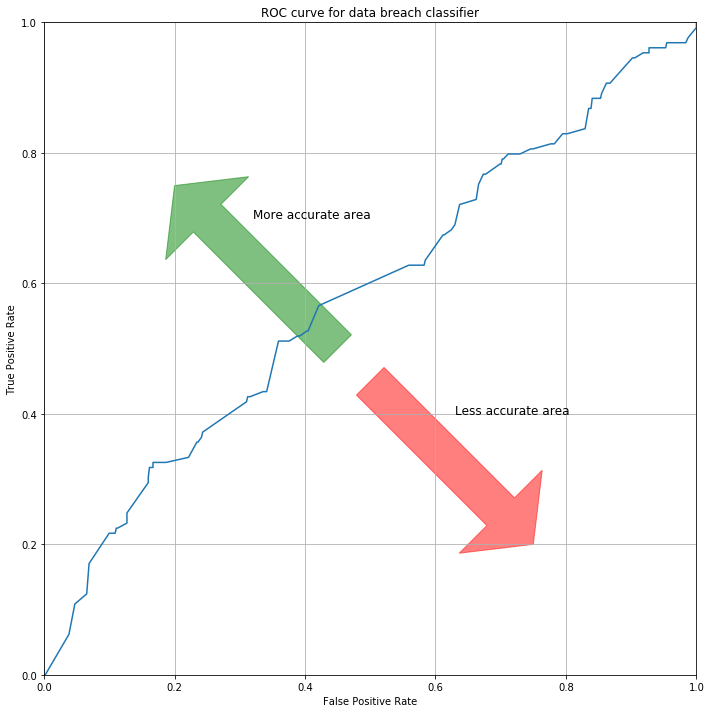

In [109]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches

clf = RandomForestClassifier(**rf_random.best_params_)
cv = StratifiedKFold(n_splits=5,shuffle=False)

clf.fit(x_train_ns,y_train_ns)

pred_train = clf.predict(x_train_ns)
pred_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train_ns)
accuracy_test = accuracy_score(pred_test,y_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train_ns), clf.predict_proba(x_train_ns)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), clf.predict_proba(x_test)[:,1])
print(accuracy_train,accuracy_test,auc_train,auc_test)
print(classification_report(y_test,pred_test ))

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for data breach classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.grid(True)


In [126]:
pd.crosstab(y_train_ns,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,596,95
1,234,246


In [127]:
pd.crosstab(y_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,489,62
1,99,30


### so from this roc curve we conclude that our roc curve leads towards more accurate and the threshold value which is around 0.82 can be considered as a good auc vallue

### 8.2.Gradient Boosting - Hyper parameter tuning

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

gb = GradientBoostingClassifier()

gf_tune = GridSearchCV(estimator = gb, param_grid = grid, cv = 2, verbose=2, n_jobs = -1)
gf_tune.fit(x_train, y_train)

print(gf_tune.best_params_)

Fitting 2 folds for each of 360 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 389 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  2.6min


{'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 64}


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.9min finished


In [111]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 842, 1: 178})
The number of classes after fit Counter({0: 700, 1: 489})


C:\Users\yash0\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


0.7746005046257359 0.75 0.8642287467134093 0.6297148243503707
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       551
           1       0.33      0.30      0.31       129

    accuracy                           0.75       680
   macro avg       0.58      0.58      0.58       680
weighted avg       0.74      0.75      0.75       680

0.7746005046257359 0.75 0.8642287467134093 0.6297148243503707


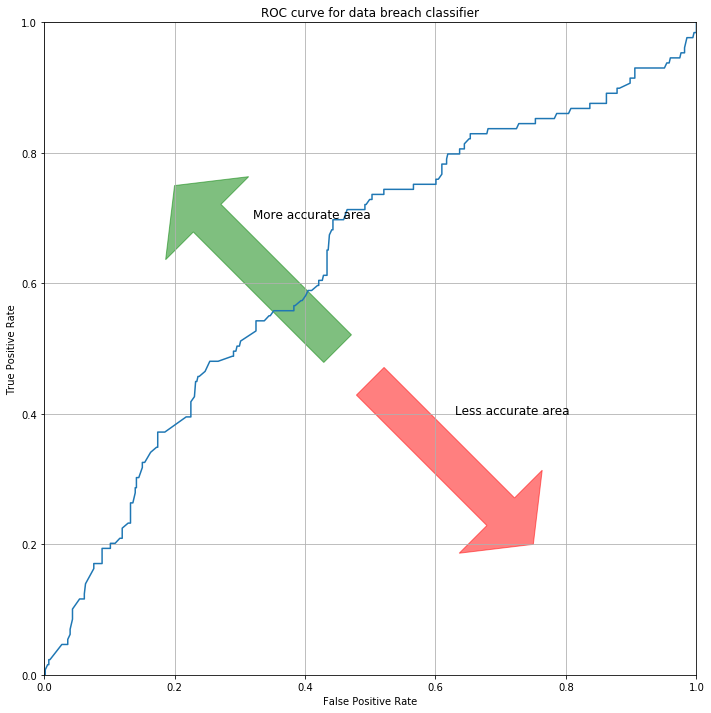

In [112]:

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(**gf_tune.best_params_)

clf.fit(x_train_ns,y_train_ns)

pred_train = clf.predict(x_train_ns)
pred_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train_ns)
accuracy_test = accuracy_score(pred_test,y_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train_ns), clf.predict_proba(x_train_ns)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), clf.predict_proba(x_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)
print(classification_report(y_test,pred_test ))
print(accuracy_train,accuracy_test,auc_train,auc_test)
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for data breach classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.grid(True)

### so from this roc curve we conclude that our roc curve leads towards more accurate and the threshold value which is around 0.83 can be considered as a good auc vallue

### From all the model we conclude that our decision tree using hypertuning parameters provides us a remarkable results. so we are conclude it

# 9.Final Model and Model Performance

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

print(rf_random.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    1.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.7s finished


{'n_estimators': 173, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': False}


In [114]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 842, 1: 178})
The number of classes after fit Counter({0: 691, 1: 480})


C:\Users\yash0\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


0.7190435525192144 0.763235294117647 0.8283390617462616 0.6297148243503707
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       551
           1       0.33      0.23      0.27       129

    accuracy                           0.76       680
   macro avg       0.58      0.56      0.57       680
weighted avg       0.74      0.76      0.75       680



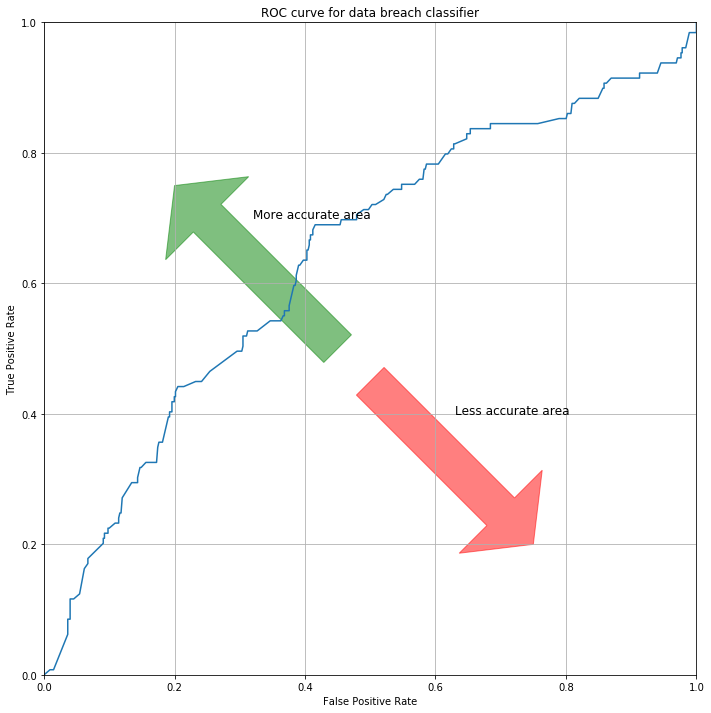

In [115]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches

clf = RandomForestClassifier(**rf_random.best_params_)
cv = StratifiedKFold(n_splits=5,shuffle=False)

clf.fit(x_train_ns,y_train_ns)

pred_train = clf.predict(x_train_ns)
pred_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train_ns)
accuracy_test = accuracy_score(pred_test,y_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train_ns), clf.predict_proba(x_train_ns)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), clf.predict_proba(x_test)[:,1])
print(accuracy_train,accuracy_test,auc_train,auc_test)
print(classification_report(y_test,pred_test ))
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for data breach classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.grid(True)


In [128]:
pd.crosstab(y_train_ns,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,596,95
1,234,246


In [129]:
pd.crosstab(y_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,489,62
1,99,30


# 10.Lift chart, Actual vs predicted and Gains chart

In [116]:
from collections import OrderedDict
import pandas as pd
import sys
%matplotlib inline
    
def plot_pandas_style(styler):
    from IPython.core.display import HTML
    html = '\n'.join([line.lstrip() for line in styler.render().split('\n')])
    return HTML(html)

def highlight_max(s,color='yellow'):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: {}'.format(color) if v else '' for v in is_max]

def decile_labels(agg1,label,color='skyblue'):
    agg_dummy = pd.DataFrame(OrderedDict((('TOTAL',0),('TARGET',0),('NONTARGET',0),('PCT_TAR',0),('CUM_TAR',0),('CUM_NONTAR',0),('DIST_TAR',0),('DIST_NONTAR',0),('SPREAD',0))),index=[0])
    agg1 = agg1.append(agg_dummy).sort_index()
    agg1.index.name = label
    agg1 = agg1.style.apply(highlight_max, color = 'yellow', subset=['SPREAD'])
    agg1.bar(subset=['TARGET'], color='{}'.format(color))
    agg1.bar(subset=['TOTAL'], color='{}'.format(color))
    agg1.bar(subset=['PCT_TAR'], color='{}'.format(color))
    return(agg1)

def deciling(data,decile_by,target,nontarget):
    inputs = list(decile_by)
    inputs.extend((target,nontarget))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['TOTAL'] = grouped.sum()[nontarget] + grouped.sum()[target]
    agg1['TARGET'] = grouped.sum()[target]
    agg1['NONTARGET'] = grouped.sum()[nontarget]
    agg1['PCT_TAR'] = grouped.mean()[target]*100
    agg1['CUM_TAR'] = grouped.sum()[target].cumsum()
    agg1['CUM_NONTAR'] = grouped.sum()[nontarget].cumsum()
    agg1['DIST_TAR'] = agg1['CUM_TAR']/agg1['TARGET'].sum()*100
    agg1['DIST_NONTAR'] = agg1['CUM_NONTAR']/agg1['NONTARGET'].sum()*100
    agg1['SPREAD'] = (agg1['DIST_TAR'] - agg1['DIST_NONTAR'])
    agg1 = decile_labels(agg1,'DECILE',color='skyblue')
    return(plot_pandas_style(agg1))

In [117]:

def scoring(features,clf,target):
    score = pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    score['TARGET'] = target
    score['NONTARGET'] = 1 - target
    return(score)

In [118]:
scores_train = scoring(x_train_ns,clf,y_train_ns)
scores_test = scoring(x_test,clf,y_test)

In [119]:
deciling(scores_train,['DECILE'],'TARGET','NONTARGET')

,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,SPREAD
DECILE,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0
1.0,117,111,6,94.8718,111,6,23.125,0.868307,22.2567
2.0,117,63,54,53.8462,174,60,36.25,8.68307,27.5669
3.0,117,82,35,70.0855,256,95,53.3333,13.7482,39.5851
4.0,117,68,49,58.1197,324,144,67.5,20.8394,46.6606
5.0,117,63,54,53.8462,387,198,80.625,28.6541,51.9709
6.0,117,35,82,29.9145,422,280,87.9167,40.521,47.3957
7.0,117,38,79,32.4786,460,359,95.8333,51.9537,43.8796
8.0,117,14,103,11.9658,474,462,98.75,66.8596,31.8904


### it tells about Gain at a given decile level is the ratio of cumulative number of targets (events) up to that decile to the total number of targets (events) in the entire data set

In [120]:
deciling(scores_test,['DECILE'],'TARGET','NONTARGET')

,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,SPREAD
DECILE,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0
1.0,68,24,44,35.2941,24,44,18.6047,7.98548,10.6192
2.0,68,18,50,26.4706,42,94,32.5581,17.0599,15.4982
3.0,68,18,50,26.4706,60,144,46.5116,26.1343,20.3773
4.0,68,10,58,14.7059,70,202,54.2636,36.6606,17.6029
5.0,68,19,49,27.9412,89,251,68.9922,45.5535,23.4387
6.0,68,8,60,11.7647,97,311,75.1938,56.4428,18.751
7.0,68,11,57,16.1765,108,368,83.7209,66.7877,16.9333
8.0,68,2,66,2.94118,110,434,85.2713,78.7659,6.50544


In [121]:

from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt

def plots(agg1,target,type):

    plt.figure(1,figsize=(20, 5))

    plt.subplot(131)
    plt.plot(agg1['DECILE'],agg1['ACTUAL'],label='Actual')
    plt.plot(agg1['DECILE'],agg1['PRED'],label='Pred')
    plt.xticks(range(10,110,10))
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.title('Actual vs Predicted', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + " " + str(type) + " %",fontsize=15)

    plt.subplot(132)
    X = agg1['DECILE'].tolist()
    X.append(0)
    Y = agg1['DIST_TAR'].tolist()
    Y.append(0)
    plt.plot(sorted(X),sorted(Y))
    plt.plot([0, 100], [0, 100],'r--')
    plt.xticks(range(0,110,10))
    plt.yticks(range(0,110,10))
    plt.grid(True)
    plt.title('Gains Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + str(" DISTRIBUTION") + " %",fontsize=15)
    plt.annotate(round(agg1[agg1['DECILE'] == 30].DIST_TAR.item(),2),xy=[30,30], 
            xytext=(25, agg1[agg1['DECILE'] == 30].DIST_TAR.item() + 5),fontsize = 13)
    plt.annotate(round(agg1[agg1['DECILE'] == 50].DIST_TAR.item(),2),xy=[50,50], 
            xytext=(45, agg1[agg1['DECILE'] == 50].DIST_TAR.item() + 5),fontsize = 13)

    plt.subplot(133)
    plt.plot(agg1['DECILE'],agg1['LIFT'])
    plt.xticks(range(10,110,10))
    plt.grid(True)
    plt.title('Lift Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel("Lift",fontsize=15)

    plt.tight_layout()

In [122]:
def gains(data,decile_by,target,score):
    inputs = list(decile_by)
    inputs.extend((target,score))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['ACTUAL'] = grouped.mean()[target]*100
    agg1['PRED'] = grouped.mean()[score]*100
    agg1['DIST_TAR'] = grouped.sum()[target].cumsum()/grouped.sum()[target].sum()*100
    agg1.index.name = 'DECILE'
    agg1 = agg1.reset_index()
    agg1['DECILE'] = agg1['DECILE']*10
    agg1['LIFT'] = agg1['DIST_TAR']/agg1['DECILE']
    plots(agg1,target,'Distribution')

In [123]:

lift_train = pd.concat([x_train_ns,scores_train],axis=1)
lift_test = pd.concat([x_test,scores_test],axis=1)

C:\Users\yash0\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\yash0\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\yash0\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\yash0\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: `item` has been deprecated and will be removed in a future version


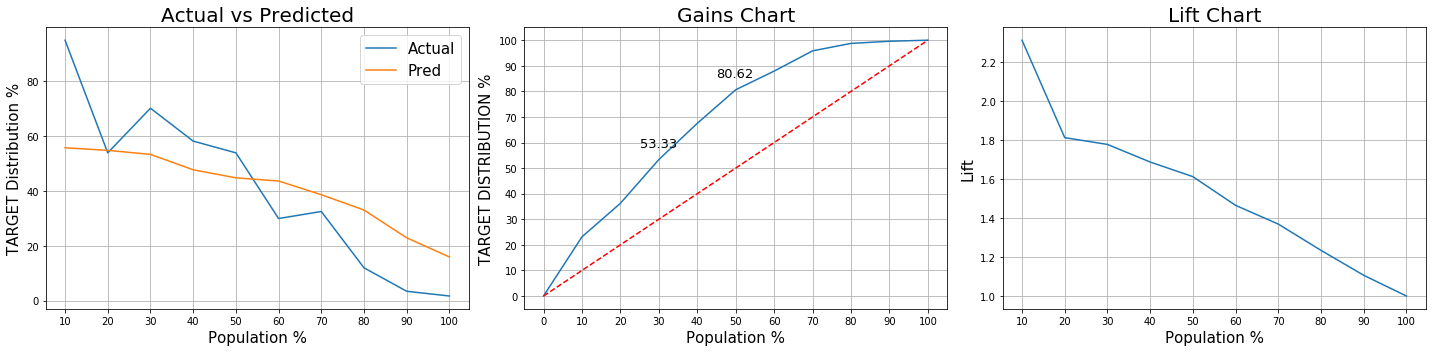

In [124]:
gains(lift_train,['DECILE'],'TARGET','SCORE')

### from the decile analysis we conclude that at each decile level our  gain chart is incresing after each interval for the train data

C:\Users\yash0\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\yash0\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\yash0\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\yash0\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: `item` has been deprecated and will be removed in a future version


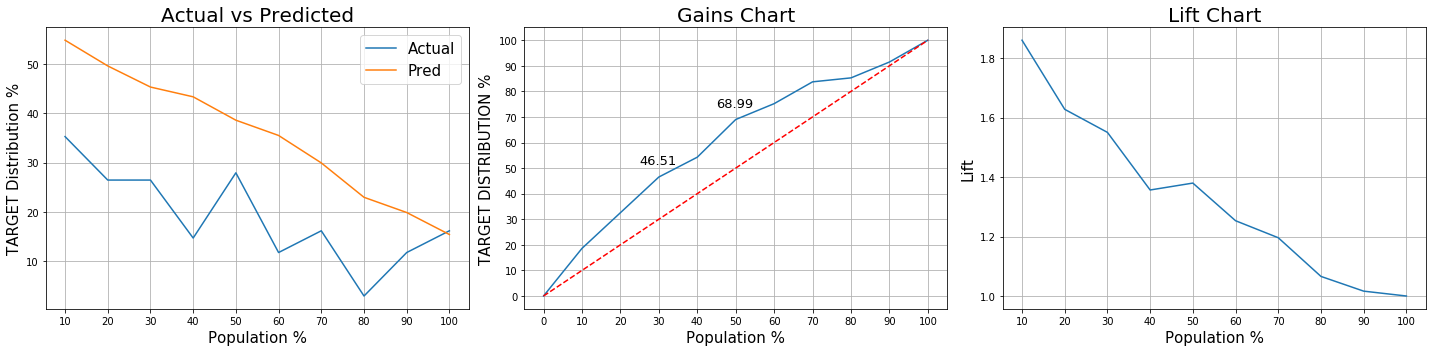

In [125]:
gains(lift_test,['DECILE'],'TARGET','SCORE')

### ### from the decile analysis we conclude that at each decile level our  gain chart is incresing after each interval for the test data

# Conclusion

# Accuracy
train accuracy-0.861
test accuracy-0.755

# confusion matrix


Train data confusion matrix

In [131]:
pd.crosstab(y_train_ns,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,596,95
1,234,246


Test data confusion matrix

In [132]:
pd.crosstab(y_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,489,62
1,99,30


# Model Name and hypertuning method

Random forest using randomized search cv

# Division of data

train-60%(1020 rows)
test-40%(680 rows)

# Balancing target variable before prediction

in cell 83, 87, 91, 95, 99, 103, 108, 111, 114

# count of test data

680 rows